## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [167]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up


In [168]:
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [169]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [170]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [171]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [172]:
t_df = df.query('group == "treatment"')
c_df = df.query('group == "control"')

In [173]:
t_df.converted.mean(), c_df.converted.mean(), df.converted.mean()

(0.11891957956489856, 0.12039917935897611, 0.11965919355605512)

e. The number of times the `new_page` and `treatment` don't match.

In [174]:
t_old = t_df.query('landing_page == "old_page"')['user_id'].nunique()
c_new = c_df.query('landing_page == "new_page"')['user_id'].nunique()

In [175]:
t_old + c_new

3893

f. Do any of the rows have missing values?

In [176]:
df.isna().any().sum()

0

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [177]:
treatment_df = df.query('group == "treatment"')
control_df = df.query('group == "control"')

In [178]:
treatment_df_old = treatment_df.query('landing_page == "old_page"')
control_df_new = control_df.query('landing_page == "new_page"')

In [179]:
treatment_df_new = treatment_df.drop(treatment_df_old.index)
control_df_old = control_df.drop(control_df_new.index)

In [180]:
treatment_df_new.query('landing_page == "old_page"').count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [181]:
treatment_df_new.shape

(145311, 5)

In [182]:
control_df_old.query('landing_page == "new_page"').count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [183]:
df2 = treatment_df_new.append(control_df_old, ignore_index = True)

In [184]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [185]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [186]:
df2[df2.user_id.duplicated()]['user_id']

1404    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [187]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [188]:
df2.drop_duplicates(inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [189]:
df2.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [190]:
p_converted_control = df2.query('group == "control"')['converted'].mean()
p_converted_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [191]:
p_converted_treatment = df2.query('group == "treatment"')['converted'].mean()
p_converted_treatment

0.11880724790277405

In [192]:
obs_diff = p_converted_treatment - p_converted_control
obs_diff

-0.0015790565976871451

d. What is the probability that an individual received the new page?

In [193]:
df2.query('landing_page == "new_page"')['user_id'].nunique()/df2['user_id'].nunique()

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

The converted rate for the treatment page stands at approx 11.88%,  slightly lower than the converted rate for control(12.03%), it seems like the treatment page fails to records more success in converting users, as compared with the control page. We therefore lack sufficent evidence that the treatment page leads to more conversion. 

However, allowing for a much longer duration might sway converted rate in favor of the treatment page.


<a id='ab_test'></a>

### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**


H0: p_new - p_old <= 0

H1: p_new - p_old > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [194]:
p_new = df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [195]:
p_old = df2['converted'].mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [196]:
n_new = df2.query('group == "treatment"')['user_id'].nunique()
n_new

145310

In [197]:
df2_t = df2.query('group == "treatment"')

d. What is $n_{old}$, the number of individuals in the control group?

In [198]:
n_old = df2.query('group == "control"')['user_id'].nunique()
n_old

145274

In [199]:
df2_c = df2.query('group == "control"')

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [200]:
new_page_converted = np.random.choice([0,1], size=n_new, p=[(1-p_new), p_new])

new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [201]:
p_new_converted = new_page_converted.mean()
p_new_converted

0.12075562590324135

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [202]:
old_page_converted = np.random.choice([0,1], size=n_old, p=[(1-p_old), p_old])

In [203]:
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [204]:
p_old_converted = old_page_converted.mean()
p_old_converted

0.11856904883186255

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [205]:
obs_diff_sim = p_new_converted - p_old_converted
obs_diff_sim

0.0021865770713788008

In [206]:
df2.shape

(290585, 5)

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [207]:

boot_samp_t = np.random.binomial(n_new, p_new, 10000)
boot_samp_c = np.random.binomial(n_old, p_old, 10000)
p_new = boot_samp_t/n_new
p_old = boot_samp_c/n_old
p_diffs = (p_new - p_old)


In [208]:
p_diff = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

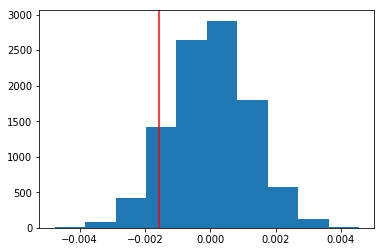

In [209]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [210]:
(p_diffs > obs_diff).mean()

0.90459999999999996

In [211]:
null_vals = np.random.normal(0, np.std(p_diffs), 10000)

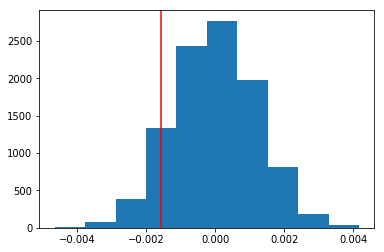

In [212]:
plt.hist(null_vals)
plt.axvline(obs_diff, color='r');

In [141]:
(null_vals > obs_diff).mean()

0.90549999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
With a p_value of 0.9046, implying the alternate hypothesis does not show statistical significance, we have evidence to not reject the null hypothesis, as it is likely the sample is from the null hypothesis.

This implies the new page preforms just as good as the old page but not better, with respect to conversion rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [213]:
import statsmodels.api as sm



In [214]:
convert_old = df2.query('landing_page == "old_page" & converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" & converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [215]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3116075339133115, 0.90517370514059103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

Both z-score(-1.311) and p_values(0.9051) do not show statistical significance, giving us evidence to reject the alternate hypothesis in favour of the null hypothesis.

This further implies the absence of evidence supporting better performance in favour of the new page as compared to the old page, with respect to conversion rates.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
Logical regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [217]:
df2['intercept'] = 1

In [218]:
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])

In [219]:
#duplicating the group column and renaming as ab_page
df2['ab_page'] = df2['group']

In [220]:
#updating ab_page as 'treatment' = 1 and 'control' = 0
df2.loc[df2['ab_page'] == 'treatment', 'ab_page'] = 1
df2.loc[df2['ab_page'] == 'control', 'ab_page'] = 0

In [221]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,1


In [222]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [223]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'new_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 16 May 2020   Pseudo R-squ.:               8.085e-06
Time:                        21:35:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
new_page      -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

In [224]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 16 May 2020   Pseudo R-squ.:               8.085e-06
Time:                        21:35:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

In [225]:
np.exp(-0.0150), 1/np.exp(-0.0150)

(0.98511193960306265, 1.0151130646157189)

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

conversion is 0.9851 times more likely on new page than on old page, the p_value of 0.190 associated with new_page does not show statistical significance.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

The difference in p_values is as a result of the hypothesis in part II being a one tailed test, while p_value for the linear regression is two tailed. calculated p_value for part II is 0.9046, while that for ab_page is 2*(1-p_value) = 2*(1-0.9046) = 0.1908 as can be verified fro

Both p_values do not show statistical significance in favour of the alternate hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

Its a good idea to see how the response variable is affected by a combination of explanatory variables fitted into a model, fitting individual explanatory variable into a model might show a different relationship as compared to a combination of explanatory variables. Giving a different insight to the resulting outcome.

The disadvantage could be non-linearlity with the response-predictor relationship, non-constant varience and normally distributed errors as well as multicollinearity between explanatory variable.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [226]:
countries_df=pd.read_csv('./countries.csv')

In [227]:
df_new=countries_df.set_index('user_id').join(df2.set_index('user_id'),how='inner')

In [228]:
df_new['country'].unique()

array(['US', 'UK', 'CA'], dtype=object)

In [229]:
df_new[['ca', 'uk', 'us']] = pd.get_dummies(df_new['country'])

In [230]:
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'us', 'ca']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Sat, 16 May 2020   Pseudo R-squ.:               1.521e-05
Time:                        21:41:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
us            -0.0099      0.013     -0.746      0.456      -0.036       0.016
ca            -0.0507      0.028     -1.786      0.074      -0.106       0.005
==============================================================================
"""

In [231]:
us, ca = np.exp(-0.0099), np.exp(-0.0507)
us, ca

(0.99014884368295719, 0.95056379690040338)

conversion is 0.9901 times more likely in US than UK holding all other variables equal, while conversion is 0.9505 times more likey in ca than UK holding all other variable equal. However the p_values for US(0.456) and CA(0.074) do not show statistical significance, implying countries do not have significant impact on conversion rates.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [232]:
df_new['us_ab_page'] = df_new['us']*df_new['ab_page']
df_new['ca_ab_page'] = df_new['ca']*df_new['ab_page']


In [233]:
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'us', 'ca', 'us_ab_page', 'ca_ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Sat, 16 May 2020   Pseudo R-squ.:               3.483e-05
Time:                        21:41:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
us             0.0057      0.019      0.306      0.760      -0.031       0.043
ca            -0.0118      0.040     -0.296      0.767      -0.090       0.066
us_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
ca_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==============================================================================
"""

conversion is 0.9851 times more likely on treatment group all other variable constant, conversion is 0.9901 times more likely in US than UK on the treatment group, all other variable equal. conversion is 0.9507 times more likely in CA than UK on the treatment group, all other variables equal.

The p_values for ab_page(0.191), us(0.457) and ca(0.074) do not show statistical significance, hence both page and countries do not significantly affect the conversion rate.

It does not seem like the interraction between countries and ab_page have any significant impact on conversion judging from the p_values of us_ab_page(0.238) and ca_ab_page(0.168), which fail to show any statistical significance.

It is however concluded that the new page does not peform better than the old page from the above statistical evidence and recommend giving a second thought to launching the new page. 

Also, more time can be allowed for the experiment to capture futher interractions which might have a different impact on the outcome.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [235]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0